Delivery_time -> Predict delivery time using sorting time 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("delivery_time.csv")

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data[data.duplicated()].shape

(0, 2)

array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

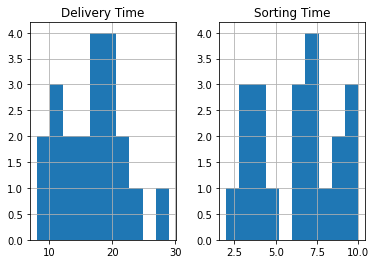

In [8]:
data.hist()

In [14]:
import seaborn as sns
import statsmodels.formula.api as smf

C:\Users\rashm\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


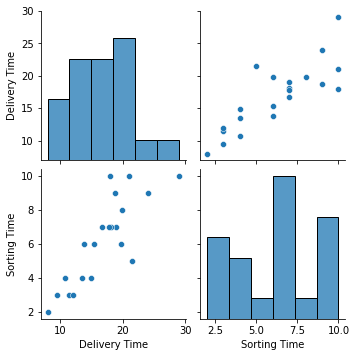

In [10]:
sns.pairplot(data)

In [11]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

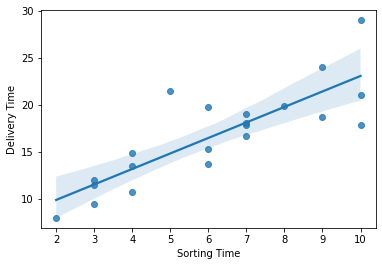

In [27]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

In [31]:
datas=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [32]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


MODEL BUILDING

In [34]:
model=smf.ols("delivery_time~sorting_time",data=datas).fit()

In [35]:
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002093F6D5588>>

MODEL TESTING

In [36]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [38]:
# Finding tvalues and pvalues
print(model.tvalues , model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [40]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

MODEL PREDICTION

In [44]:
# Automatic Prediction for say sorting time 6, 10
new_data=pd.Series([6,10])
new_data

0     6
1    10
dtype: int64

In [45]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,10


In [46]:
model.predict(data_pred)

0    16.476853
1    23.072933
dtype: float64